#### MT2022026
#### ASWATHA NARAYANAN

Diamond Price prediction using Linear Regression

In [30]:
# importing necessary packages
# reading diamond.csv

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

ds=pd.read_csv("diamonds.csv")

In [31]:
ds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [32]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [33]:
ds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [34]:
ds["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [35]:
#droping the 1st column that is the row num
ds.drop(columns="Unnamed: 0",inplace=True)

In [36]:
#Finding the non numerical features
cat_col = ds.select_dtypes(['object']).columns

In [37]:
cat_col

Index(['cut', 'color', 'clarity'], dtype='object')

In [38]:
#converting non numerical features to numerical
ds[cat_col]=ds[cat_col].apply(lambda x: pd.factorize(x)[0])

In [39]:
ds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,0,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,0,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,0,2,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,2,0,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,6,1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,6,1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,6,1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,3,0,61.0,58.0,2757,6.15,6.12,3.74


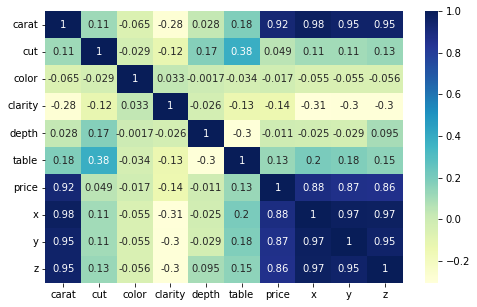

In [40]:
# Plotting correlation matrix to find the dependent features
fig = plt.figure(figsize =(8, 5))
sn.heatmap(ds.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

In [41]:
# removing the rows with any of the measurement is 0
ds=ds[ds["x"]!=0]
ds=ds[ds["y"]!=0]
ds=ds[ds["z"]!=0]

In [42]:
ds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,1.228913,3.174091,2.256250,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.266077,2.050345,1.766337,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,0.000000,1.000000,1.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,1.000000,4.000000,2.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,5.000000,3.000000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [43]:
ds.drop(columns=["x","y","z"],inplace=True)

In [44]:
ds

,carat,cut,color,clarity,depth,table,price
0,0.23,0,0,0,61.5,55.0,326
1,0.21,1,0,1,59.8,61.0,326
2,0.23,2,0,2,56.9,65.0,327
3,0.29,1,1,3,62.4,58.0,334
4,0.31,2,2,0,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,0,6,1,60.8,57.0,2757
53936,0.72,2,6,1,63.1,55.0,2757
53937,0.70,3,6,1,62.8,60.0,2757
53938,0.86,1,3,0,61.0,58.0,2757


In [45]:
ds.duplicated().sum()

802

In [46]:
ds.loc[ds.duplicated(),:]

,carat,cut,color,clarity,depth,table,price
438,0.70,0,3,1,61.4,56.0,2815
786,0.62,0,5,4,61.6,56.0,2861
836,0.82,0,4,0,62.3,56.0,2867
951,0.50,0,0,4,62.2,54.0,2889
1005,0.79,0,5,1,62.3,57.0,2898
...,...,...,...,...,...,...,...
53312,0.72,0,1,3,61.7,56.0,2650
53639,0.30,0,6,1,61.0,56.0,552
53736,0.70,0,5,3,62.3,57.0,2723
53738,0.70,0,5,3,62.3,57.0,2723


In [47]:
#there are 802 duplicates column and removing those
ds.drop_duplicates(inplace=True)

In [48]:
ds

,carat,cut,color,clarity,depth,table,price
0,0.23,0,0,0,61.5,55.0,326
1,0.21,1,0,1,59.8,61.0,326
2,0.23,2,0,2,56.9,65.0,327
3,0.29,1,1,3,62.4,58.0,334
4,0.31,2,2,0,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,0,6,1,60.8,57.0,2757
53936,0.72,2,6,1,63.1,55.0,2757
53937,0.70,3,6,1,62.8,60.0,2757
53938,0.86,1,3,0,61.0,58.0,2757


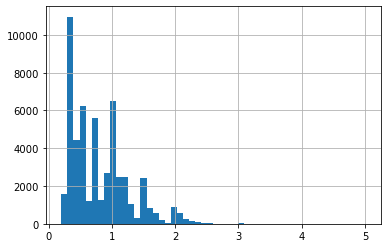

<Figure size 576x360 with 0 Axes>

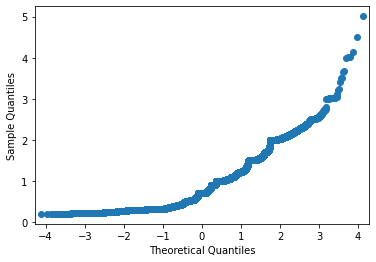

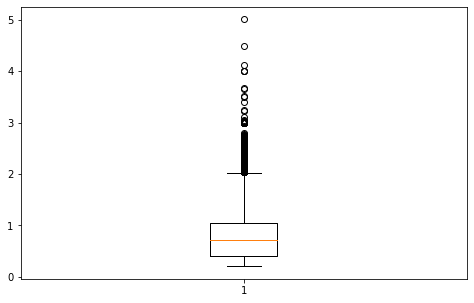

In [49]:
#plotting the carat feature on differnt graphs as it is highly correlated to price
ds["carat"].hist(bins=50)
fig = plt.figure(figsize =(8, 5))
sm.qqplot(ds["carat"])
fig = plt.figure(figsize =(8, 5))
plt.boxplot(ds["carat"])
plt.show()

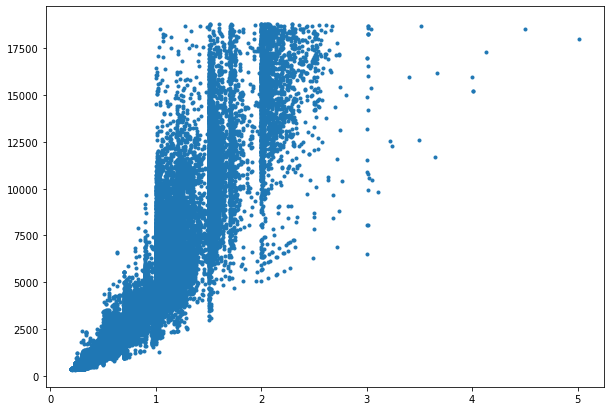

In [50]:
# Plotting the carat feature against price
fig = plt.figure(figsize =(10, 7))
plt.scatter(ds["carat"],ds["price"],marker='.')
plt.show()

In [51]:
#shuffle and split test and train data
ds=ds.sample(frac=1)
#adding a colunm for w0
ds.insert(0,'b',1)

In [52]:
class UniLinearRegression():

    """
    Function to find the parameter (weights) using closed form

        - it takes train data and labels as input
        - finds w = (X.T .X)^-1.X.T .y                      <X.T - X transpose>
        - returns the optimised w
    """
    def closed_form(self,x,y):
        # x -- n*2 , y --n*1 for univarient
        #self.w=(y.sum()-x.shape[0]*self.b)/x.sum()
        w=np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
        return w

    """
    Function to find derivative of weights

        -It takes features ,labels and predicted labels as input
        - finds 
            dw = (-1/m) * X.T . (y-y_pred)         < m - no of features>
        - it returns dw
    """
    def differentiation(self,x,y,y_pred):
        dw=(-1/x.shape[0])*np.dot(x.T,y-y_pred)
        return dw

    """
    Function to find gradient descent

        - it takes the traing data ,the intial values of weight and predticion with that weigths as input
        - it iteratie for 10000 times with the learining rate of 0.003
        -  finds
            w=w-learning_rate*dw
            b=b-learning_rate*db for every iteration using differntiation function
        - it returns the optimal weights
    """ 
    def gradientdescent(self,x,y,y_pred,w):
        learningrate=0.003
        for i in range(10000):
            dw=self.differentiation(x,y,y_pred)
            w=w-learningrate*dw
            y_pred=np.dot(x,w)
            if (i%1000==0):
                print("loss after ",i," iteration",self.lossfuntion(y,y_pred))
        return w

    """
    Function to predict the label for given test data

        - it takes optimal weights and features as inputs
        - find the prediton for the test data using the weights
        - it returs the predicted values
    """
    def predict(self,x_test,w):
        y_pred = np.dot(x_test,w)
        return y_pred
    
    """
    Function to find the loss
        - it takes the actual values and predicted values as input
        - finds the mean squred error between those and returns
    """
    def lossfuntion(self,y_test,y_pred):
        return (1/y_test.shape[0])*((y_test - y_pred)**2).sum()

Univarient Linear regression

In [53]:
"""
Univarient

Data Split (80% train and 20% test)
"""

#print(ds)
x_train=ds.iloc[:int(ds.shape[0]*0.8),:2]
y_train=ds.iloc[:int(ds.shape[0]*0.8),7]
x_test=ds.iloc[int(ds.shape[0]*0.8):,:2]
y_test=ds.iloc[int(ds.shape[0]*0.8):,7]
#print(y_train)

# arr=x_train.values
# x_train=arr.reshape((x_train.shape[0],1))

arr=y_train.values
y_train=arr.reshape((y_train.shape[0],1))

# arr=x_test.values
# x_test=arr.reshape((x_test.shape[0],1))

arr=y_test.values
y_test=arr.reshape((y_test.shape[0],1))


[[-2268.12735742]
 [ 7765.79597392]]
mean squred loss: 2405171.7168762092


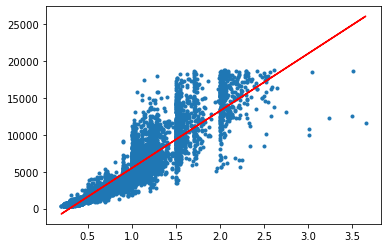

In [54]:
"""
Univarient Linear regression using carat

Closed Form
"""
#
model=UniLinearRegression()
#print(y_train.T.shape)
w=model.closed_form(x_train,y_train)
print(w)
y_pred=model.predict(x_test,w)
#print(x_test)

#plotting line over the test data
plt.scatter(x_test["carat"],y_test,marker='.')
plt.plot(x_test["carat"],y_pred,color='red')
print("mean squared loss:",model.lossfuntion(y_test,y_pred))

loss after  0  iteration 31400793.990747575
loss after  1000  iteration 5545558.104356096
loss after  2000  iteration 3863958.781920249
loss after  3000  iteration 3088065.1793195684
loss after  4000  iteration 2729930.810352066
loss after  5000  iteration 2564624.344603977
loss after  6000  iteration 2488322.738318754
loss after  7000  iteration 2453103.697760611
loss after  8000  iteration 2436847.410662284
loss after  9000  iteration 2429343.8879644712
[[-2165.23777584]
 [ 7654.08610151]]
mean squred error: 2410332.81936609


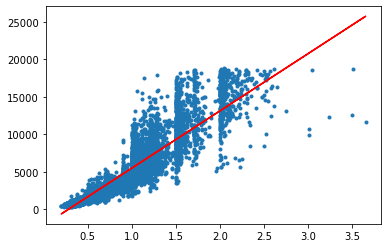

In [55]:
"""
Univarient Linear regression using carat

Gradient descent
"""
# print(y_test)

w=np.full((x_train.shape[1],1),0.0)
y_pred=np.dot(x_train,w)
w=model.gradientdescent(x_train,y_train,y_pred,w)
print(w)
y_pred=model.predict(x_test,w)

#plotting line over the test data
plt.scatter(x_test["carat"],y_test,marker='.')
plt.plot(x_test["carat"],y_pred,color='red')
print("mean squared error:",model.lossfuntion(y_test,y_pred))

Multivarient Linear regression

In [56]:
"""
Multi varient linear regression

data split (80% train and 20% test)
"""
# x=ds
# print(ds)
x=ds.drop(columns='b',inplace=False)

x_m_train=x.iloc[:int(x.shape[0]*0.8),:6]
y_m_train=x.iloc[:int(x.shape[0]*0.8),6]
x_m_test=x.iloc[int(x.shape[0]*0.8):,:6]
y_m_test=x.iloc[int(x.shape[0]*0.8):,6]



"""
Normalise train and test data

"""
x_m_train=(x_m_train-x_m_train.mean())/x_m_train.std()
x_m_test=(x_m_test-x_m_test.mean())/x_m_test.std()
x_m_train.insert(0,'b',1)
x_m_test.insert(0,'b',1)

#converting to numpy
arr=y_m_train.values
y_m_train=arr.reshape((y_m_train.shape[0],1))


#converting to numpy
arr=y_m_test.values
y_m_test=arr.reshape((y_m_test.shape[0],1))
# print(x_m_train)
# print(y_m_test.shape)

In [57]:
"""Multi varient linear regression

Closed form
"""
w=model.closed_form(x_m_train,y_m_train)
#print(w)
y_m_pred=model.predict(x_m_test,w)
#print(x_test)
# plt.scatter(x_m_test,y_m_test,marker='.')
# plt.plot(x_m_test,y_m_pred,color='red')
print("mean squared loss:",model.lossfuntion(y_m_test,y_m_pred))



mean squared loss: 2095741.7846385331


In [58]:
"""
Multivarient Linear regression

Gradient descent
"""
print(x_m_train.shape)
w=np.full((x_m_train.shape[1],1),0.0)
y_m_pred=np.dot(x_m_train,w)
w=model.gradientdescent(x_m_train,y_m_train,y_m_pred,w)
#print(w)
y_m_pred=model.predict(x_m_test,w)
# plt.scatter(x_test["carat"],y_test,marker='.')
# plt.plot(x_test["carat"],y_pred,color='red')
print("mean squared error:",model.lossfuntion(y_m_test,y_m_pred))

(42494, 7)
loss after  0  iteration 31461150.108863853
loss after  1000  iteration 2232672.997283083
loss after  2000  iteration 2087207.7354546357
loss after  3000  iteration 2084993.3962815492
loss after  4000  iteration 2084902.0495574006
loss after  5000  iteration 2084895.6558798754
loss after  6000  iteration 2084895.1449549487
loss after  7000  iteration 2084895.1031522974
loss after  8000  iteration 2084895.0997188077
loss after  9000  iteration 2084895.099436618
mean squared error: 2095741.6573167287
